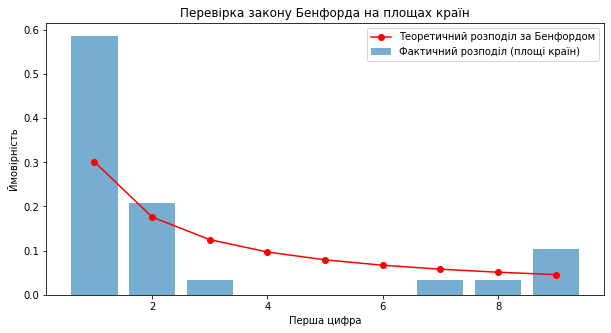

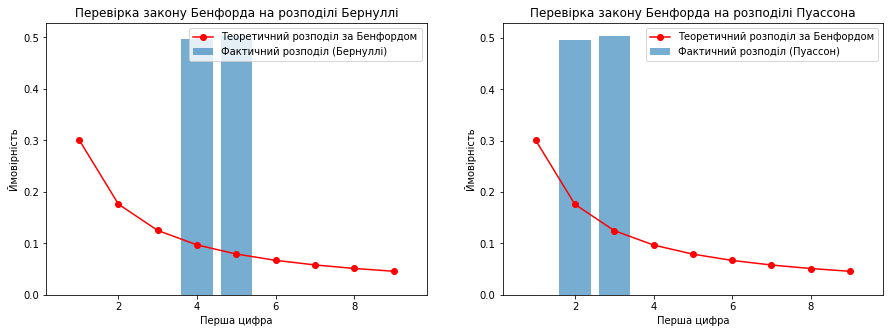

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def benford_distribution(base=10):
    return [np.log10(1 + 1/d) for d in range(1, base)]

def first_digit(data):
    return [int(str(x)[0]) for x in data if x > 0]

data = pd.read_csv("data.csv")
areas = data['Area'].values
area_first_digits = first_digit(areas)

area_counts = np.bincount(area_first_digits, minlength=10)[1:] / len(area_first_digits)
benford_probs = benford_distribution()

plt.figure(figsize=(10, 5))
plt.bar(range(1, 10), area_counts, alpha=0.6, label="Фактичний розподіл (площі країн)")
plt.plot(range(1, 10), benford_probs, 'ro-', label="Теоретичний розподіл за Бенфордом")
plt.xlabel("Перша цифра")
plt.ylabel("Ймовірність")
plt.title("Перевірка закону Бенфорда на площах країн")
plt.legend()
plt.show()

bern_numbers = np.random.binomial(999999, 0.5, 10000)
pois_numbers = np.random.poisson(300000, 10000)

bern_first_digits = first_digit(bern_numbers)
pois_first_digits = first_digit(pois_numbers)

bern_counts = np.bincount(bern_first_digits, minlength=10)[1:] / len(bern_first_digits)
pois_counts = np.bincount(pois_first_digits, minlength=10)[1:] / len(pois_first_digits)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].bar(range(1, 10), bern_counts, alpha=0.6, label="Фактичний розподіл (Бернуллі)")
axs[0].plot(range(1, 10), benford_probs, 'ro-', label="Теоретичний розподіл за Бенфордом")
axs[0].set_xlabel("Перша цифра")
axs[0].set_ylabel("Ймовірність")
axs[0].set_title("Перевірка закону Бенфорда на розподілі Бернуллі")
axs[0].legend()

axs[1].bar(range(1, 10), pois_counts, alpha=0.6, label="Фактичний розподіл (Пуассон)")
axs[1].plot(range(1, 10), benford_probs, 'ro-', label="Теоретичний розподіл за Бенфордом")
axs[1].set_xlabel("Перша цифра")
axs[1].set_ylabel("Ймовірність")
axs[1].set_title("Перевірка закону Бенфорда на розподілі Пуассона")
axs[1].legend()

plt.show()